# Final Project: Wine Prediction

### Team Members: Yihe Hao (N19289855) and Tian Xie (N18792946)
  
   In this project, we are going to predict the wine quality based on one, or more of the following criterias: 
   * Fixed acidity
   * Volatile acidity
   * Citric acid
   * Residual sugar
   * Chlorides
   * Free sulfur dioxide
   * Total sulfur dioxide
   * Density
   * pH
   * Sulphates
   * Alcohol Level
   
We are going to use the following dataset: https://archive.ics.uci.edu/ml/datasets/Wine+Quality<br>
This dataset is based on the UCI Machine Learning Repository database, and was first published in 2009.
    
**Here's the citation:** <br>
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.



First, let's download some standard packages that's essential to this project

In [0]:
import pydot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from scipy.optimize import curve_fit
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from sklearn import linear_model,preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet


Then, we've download the Dataset and import it from our local harddrive. After that, we'll need to clean up the dataset a little bit. 
<br>Here are the first few lines of our cleaned dataset: 

In [0]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

#Clean Up the data a little bit 
names=['fixed acidity', 'volatile acidity' ,'citric acid' ,'residual sugar' ,
'chlorides' ,'free sulfur dioxide' ,'total sulfur dioxide' ,'density' ,
'pH' ,'sulphates' ,'alcohol ']

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


After that, we've used the `df.hist()` command to observe the overall summary of the cleaned dataset. 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

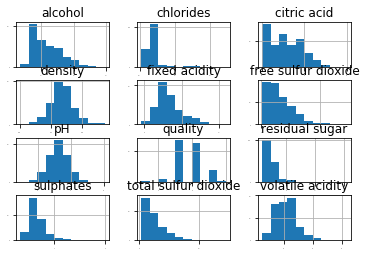

In [0]:
#Print out overall summary of the data

print(df.describe())
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

### A Glance at the Wine Quality

  In order to predict the wine quality, first we would need to look at the overall data distribution trend for the wine quality. In this dataset, there's roughly 1600 rows of data. 

  As what we can see from the bar plot below, although it seems like it satisfies the normal distribution trend. However, the wine quality are mostly concentrated on the range of 3-9, which means, there's no extremely low/high quality ratings in this dataset.

  Furthermore, the bell curve clearly states that among all of the wine quality in this dataset, 5 is the most common rating.
  
  This is one of the main reasons why accuracy rate is so low compared with the the labs in which we've done beforehand. 

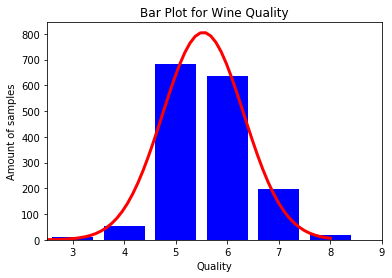

In [0]:
#Construct the bar plot

a = df['quality']
a_3 = []
a_4 = []
a_5 = []
a_6 = []
a_7 = []
a_8 = []
a_9 = []

a_other = []
for i in range(0,1599):
  if a[i] == 3:
    a_3.append(a[i])
  elif a[i] == 4:
    a_4.append(a[i])  
  elif a[i] == 5:
    a_5.append(a[i])
  elif a[i] == 6:
    a_6.append(a[i])
  elif a[i] == 7:
    a_7.append(a[i])
  elif a[i] == 8:
    a_8.append(a[i])
  elif a[i] == 9:
    a_9.append(a[i])
  else:
    a_other.append(a[i])
    
a_3 = len(np.array(a_3))
a_4 = len(np.array(a_4))   
a_5 = len(np.array(a_5))
a_6 = len(np.array(a_6))
a_7 = len(np.array(a_7))
a_8 = len(np.array(a_8))
a_9 = len(np.array(a_9))

height = [a_3,a_4,a_5,a_6,a_7,a_8,a_9]
category = ['3','4','5','6','7','8','9']

plt.bar(category,height, color ='blue')     
plt.xlabel('Quality')
plt.ylabel('Amount of samples')
plt.title('Bar Plot for Wine Quality')

#Print a bell curve above the bar plot. 

def func(x, a, b, c):
    # a Gaussian distribution
    return a * np.exp(-(x-b)**2/(2*c**2))
  
list1 = range(0,7)
list2 = height  
popt, pcov = curve_fit(func, list1, list2)

x_curve = np.linspace(-5, 5, 100)
y_curve = func(x_curve, *popt)

plt.plot(x_curve, y_curve, c='r', lw = '3')
plt.xlim([-0.5,6])
plt.show()

### Improving accuracy rate
  In order to improve the accuracy rate, we've divided the wine quality into the following three ratings: 
  
  * 1 - 4 would be poor quality
  * 5 - 6 would be average quality
  * 7 - 10 would be good quality
  
After dividing the data into three categories, we've labeled those three category as `[0,1,2]`. 

We've also display the first two columns for our own references. 
  
After that, we've seperated the label from all features for scaling later.

In [0]:
#Defining the splits for categories. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
df['quality_categorical'] = pd.cut(df['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
display(df.head(n=2))
# Split the data into features and target label
quality_raw = df['quality_categorical']
features_raw = df.drop(['quality', 'quality_categorical'], axis = 1)

y_df=df['quality_categorical'].values
y=np.array(y_df)
X_df=features_raw.values
X=np.array(X_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In order to obtain a higher accuracy rate, we've scaled `X` like we did in the neural network lab assignment. 

We've also splitted the data into training & testing for further use. 

In [0]:
#Scale the data first
X_scaled=preprocessing.scale(X)

#Split the data into Training & Testing
xtr,xts,ytr,yts = train_test_split(X_scaled,y)

### Calculating Accuracy Rate

#### 3.1 Logistic Regression

Use Logistic Regression to fit the training data `xtr` and `ytr`

In [0]:
#logreg=linear_model.LogisticRegression(C=1e5,multi_class='ovr',solver='lbfgs')
logreg=linear_model.LogisticRegression(C=1e5,multi_class='ovr',solver='lbfgs')

#logreg.fit(X_scaled,y)
logreg.fit(xtr,ytr)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

Obtain the accuracy rate for using logistic regression and print it out:

In [0]:
#yhat=logreg.predict(X_scaled)
yhat=logreg.predict(xts)
acc=np.mean(yhat==yts)
print('For Logistic Regression, Accuracy rate on the training data is {0:f}'.format(acc))

For Logistic Regression, Accuracy rate on the training data is 0.815000


#### 3.2 SVM

Use SVM to fit the training data `xtr` and `ytr`

In [0]:
svc = svm.SVC(kernel="linear",C=2.8, gamma=.0073,verbose=10)
#svc.fit(X_scaled,y)
svc.fit(xtr,ytr)

[LibSVM]

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

Obtain the accuracy rate for using SVM and print it out:

In [0]:
yhat_svm=svc.predict(xts)
acc=np.mean(yhat_svm==yts)
print('For SVM, Accuracy rate on the training data is {0:f}'.format(acc))

For SVM, Accuracy rate on the training data is 0.787500


Print out the mispredicted data (For our own reference)

In [0]:
a=np.where(yhat==2)[0]
a

array([ 27,  40,  53,  64,  73,  86, 118, 138, 176, 192, 239, 250, 279,
       295, 300, 301, 318, 327, 331, 342, 349, 355, 362], dtype=int64)

#### 3.3 Decision Tree and Random Forest
Use Decision Tree and Random Forest Classifier to fit the training data `xtr` and `ytr`

Obtain the error rate for using this method, and print out the accuracy rate:

In [0]:
clf = DecisionTreeClassifier()
clf.fit(xtr, ytr)
yhat_decision=clf.predict(xts)
acc_clf=np.mean(yhat_decision==yts)

print('For Decision Tree Classifier, Accuracy rate on the training data is {0:f}'.format(acc_clf))

For Decision Tree Classifier, Accuracy rate on the training data is 0.775000


Print out the mispredicted data (For our own reference)

In [0]:
a=np.where(yhat_decision==0)[0]
a

array([ 41,  69,  76,  88,  92, 112, 151, 168, 169, 202, 228, 248, 276,
       308, 309, 313, 352, 364, 375, 380, 385, 398], dtype=int64)

Print out the label of those mispredicted data (For our own reference)

In [0]:
y_error=np.where(yhat!=yts)[0]
y[y_error]

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2], dtype=int64)

For a difference observation, instead of using `test_size = 0.5`, we've rescaled the training and testing data by using

`test_size = 0.33`

Use decision tree classifier to fit the training data again, and observe the accuracy rate to see if there's any differences.

In [0]:
Xtr,Xts,Ytr,Yts = train_test_split(X_scaled,y,test_size=0.33)

clf = DecisionTreeClassifier()
clf.fit(Xtr, Ytr)
yhat_decision=clf.predict(Xts)
acc_clf=np.mean(yhat_decision==Yts)
print('For Decision Tree Classifier under a different scaling method, Accuracy rate on the training data is {0:f}'.format(acc_clf))

For Decision Tree Classifier under a different scaling method, Accuracy rate on the training data is 0.814394


After that, we've plotted the decision tree by using the reference of `pydot` and `sklearn.tree`.

Figure below shows our drawings for the decision tree. 

Here's a look at our decision tree:


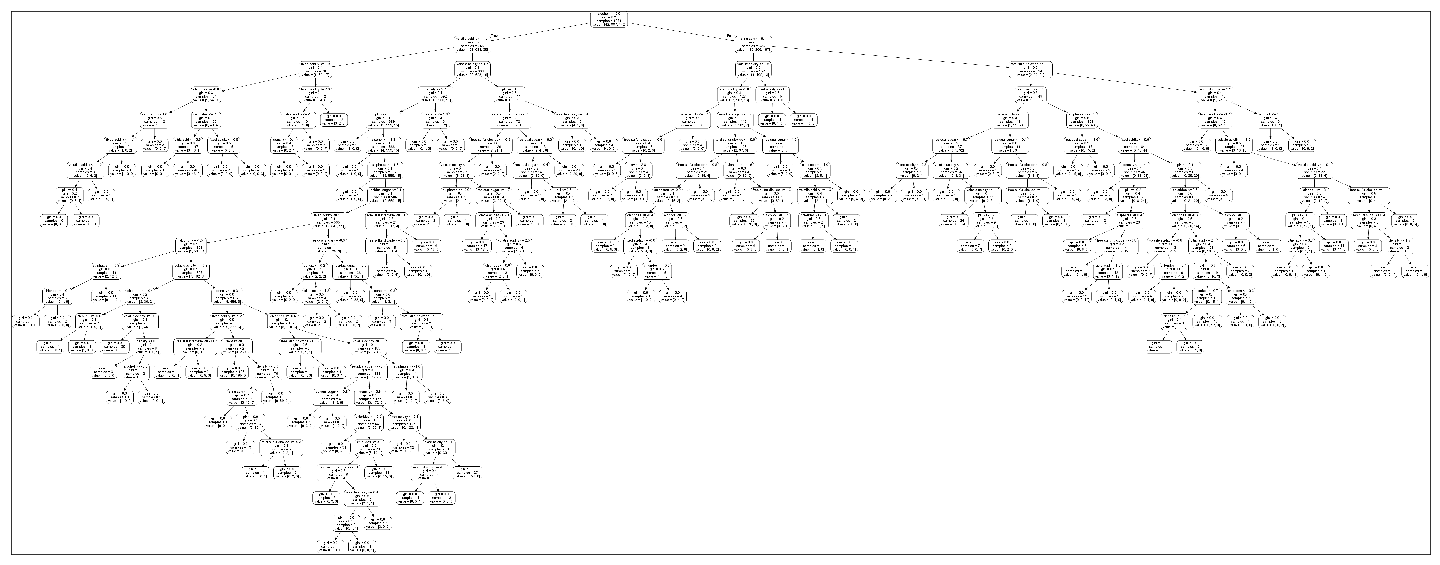

In [0]:
#Plot the decision tree

names_clf=['fixed acidity', 'volatile acidity' ,'citric acid' ,'residual sugar' ,
'chlorides' ,'free sulfur dioxide' ,'total sulfur dioxide' ,'density' ,
'pH' ,'sulphates' ,'alcohol ']
export_graphviz(clf, out_file = 'clf_wine.dot', feature_names = names_clf, rounded = True, precision = 1)

(graph_wine, ) = pydot.graph_from_dot_file('clf_wine.dot')
graph_wine.write_png('clf_wine.png')

def plot_decisiontree(img_name):
    tree_image = plt.imread(img_name)
    plt.figure(figsize=(100,10))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tree_image)
    plt.show()
print("Here's a look at our decision tree:")
plot_decisiontree('clf_wine.png')


#### 3.4 Importance Calculation

We've also calculated the importance factor for all the different categories, according to our result, it seems like volatile acidity and alcohol would result in a more successful quality rating. 

In [0]:

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(names_clf, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.16
Variable: volatile acidity     Importance: 0.14
Variable: citric acid          Importance: 0.13
Variable: residual sugar       Importance: 0.1
Variable: fixed acidity        Importance: 0.09
Variable: chlorides            Importance: 0.08
Variable: sulphates            Importance: 0.08
Variable: pH                   Importance: 0.07
Variable: free sulfur dioxide  Importance: 0.06
Variable: total sulfur dioxide Importance: 0.06
Variable: density              Importance: 0.05


In [0]:
clf_prune = DecisionTreeClassifier(max_leaf_nodes = 20, min_samples_leaf = 1, max_depth= 5,max_features=3)
clf_prune.fit(Xtr,Ytr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=3, max_leaf_nodes=20, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Obtain the accuracy rate for the decision tree, as what we can see, the accuracy rate isn't very high. 

In [0]:
yhat_decision_prune=clf_prune.predict(Xts)
acc_clf_prune=np.mean(yhat_decision_prune==Yts)
print(acc_clf_prune)

0.801136363636


#### 3.5 Random Forest

First, let's import all necessary libraries to make the random forest work. 

After that we've fit the random tree by using the `rf.fit(Xtr,Ytr)` command

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf=1, max_depth=None, random_state = None,max_features=3)
rf.fit(Xtr, Ytr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Use the fitting result to predict the testing data `Xts`, and obtain the accuracy rate for Random Forest. 

In [0]:
yhat_rf=rf.predict(Xts)
acc_rf=np.mean(yhat_rf==Yts)


print("The accuracy rate for Random Forest is: ", acc_rf)

The accuracy rate for Random Forest is:  0.892045454545


#### 3.6 LASSO
This time, we will use LASSO to fit the training data `xtr` and `ytr`

In [0]:
regr = Lasso(alpha = 1e-3,max_iter=100,tol=0.01)
regr.fit(xtr,ytr)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.01, warm_start=False)

Obtain the error rate for using this method, and print out the `rsq`

In [0]:
Yhat = regr.predict(xts)
rsq = r2_score(yts, Yhat)
print('For LASSO, rsq is {0:f}'.format(rsq))

For LASSO, rsq is 0.226592


For a difference observation, instead of using `test_size = 0.5`, we've rescaled the training and testing data by using 

`test_size = 0.33`. 

Use LASSO to fit the training data again, and observe the rsq to see if there's any differences.

In [0]:
regr = Lasso(alpha = 1e-3,max_iter=100,tol=0.01)
regr.fit(Xtr,Ytr)

#Print out rsq
Yhat=regr.predict(Xts)
rsq=r2_score(Yts,Yhat)
print('Using a different training & testing scale, For LASSO, rsq is {0:f}'.format(rsq))

Using a different training & testing scale, For LASSO, rsq is 0.198212


After that, we've plotted by using stem plot. As what we can see from the graph below, the accuracy is not as stable as what we've expected. This is due to the fact that the logistic regression is not good with small sample data predictions.

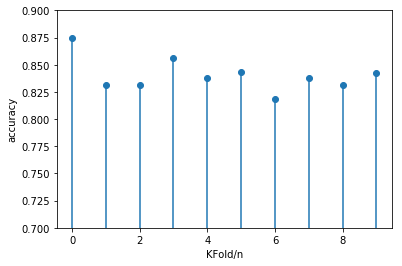

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
nfold = 10
kf = KFold(n_splits=nfold,shuffle=True) 
    ytrLo = y[Itr]
    XtsLo = X_scaled[Its,:]
    ytsLo = y[Its]
    
    logreg.fit(XtrLo,ytrLo)
    yhatLo = logreg.predict(XtsLo)
    
    
    acc_rate.append(np.mean(ytsLo == yhatLo))

plt.stem(range(10),acc_rate)
plt.ylim([0.7,0.9])
plt.xlabel('KFold/n')
plt.ylabel('accuracy')
plt.show()

#### 3.7 Logistic Regression and Random Tree  using Down-sampling

First, we've defined a function which would downsample the data in `Wine Quality`

Here's how we handle the data:

* First, we've divided the data into three categories,
  * `0` for Low Quality
  *  `1` for Medium Quality
  * `2` for High Quality

* After that, we've reduce the amount of data which falls into the second category (`Medium Quality`) by implementing the following formula: 

  * `np.random.randint(len(data1), size=percent * (len(df) - len(data1))) `
  * The function of this formula is to obtain a certain amount of unwanted data and exclude it from our overall dataset. 
 

In [0]:

def lower_sample_data(df, percent):

    data2 = df[df['quality_categorical'] == 2]
    data1 = df[df['quality_categorical'] == 1]  
    data0 = df[df['quality_categorical'] == 0]  
    index = np.random.randint(
        len(data1), size=percent * (len(df) - len(data1)))  
    lower_data1 = data1.iloc[list(index)]  
    return(pd.concat([data2, lower_data1, data0]))


After we've Down Sample the `Overall Quality` dataset, we've decided to use logistic regression on this dataset again, and obtain the overall accuracy rate. As what we can see from the accuracy below, the accuracy rate is still not as high as what we've expected to be. Therefore we would need to try another method of approach. 

In [0]:
percent_number=np.arange(1,20)
acc_total=[]
for i in percent_number: 
    df_lower=lower_sample_data(df,i)
    quality_lower_raw = df_lower['quality_categorical']
    features_lower_raw = df_lower.drop(['quality', 'quality_categorical'], axis = 1)

    y_df_lower=df_lower['quality_categorical'].values
    y_lower=np.array(y_df_lower)
    X_df_lower=features_lower_raw.values
    X_lower=np.array(X_df_lower)
    #Scale the data first
    X_scaled_lower=preprocessing.scale(X_lower)

    #Split the data into Training & Testing
    xtr_l,xts_l,ytr_l,yts_l = train_test_split(X_scaled_lower,y_lower)
    #logreg=linear_model.LogisticRegression(C=1e5,multi_class='ovr',solver='lbfgs')
    logreg=linear_model.LogisticRegression(C=1e5,multi_class='ovr',solver='lbfgs')

    #logreg.fit(X_scaled,y)
    logreg.fit(xtr_l,ytr_l)
    yhat=logreg.predict(xts)
    acc_l=np.mean(yhat==yts)
    acc_total.append(acc_l)
acc_max=np.where(acc_total==np.max(acc_total))[0]

print(np.max(acc_total))
print(acc_max)

0.82
[3]


We've used the Random Tree method again in this block, and we've successfully obtained an error rate whicch is greater than 95%. Among all of the methodology that we've tried, this approach seems to be the most efficient.

In [0]:
percent_number=np.arange(1,20)
acc_total=[]
for i in percent_number: 
    df_lower=lower_sample_data(df,i)
    quality_lower_raw = df_lower['quality_categorical']
    features_lower_raw = df_lower.drop(['quality', 'quality_categorical'], axis = 1)

    y_df_lower=df_lower['quality_categorical'].values
    y_lower=np.array(y_df_lower)
    X_df_lower=features_lower_raw.values
    X_lower=np.array(X_df_lower)
    #Scale the data first
    X_scaled_lower=preprocessing.scale(X_lower)

    #Split the data into Training & Testing
    xtr_l,xts_l,ytr_l,yts_l = train_test_split(X_scaled_lower,y_lower)
    
    rf = RandomForestClassifier(n_estimators = 200, min_samples_leaf=1, max_depth=None, random_state = None,max_features=3)
    rf.fit(xtr_l, ytr_l)

    yhat_rf_lower=rf.predict(Xts)
    acc_l=np.mean(yhat_rf_lower==Yts)
    acc_total.append(acc_l)
acc_max=np.where(acc_total==np.max(acc_total))[0]

print(np.max(acc_total))
print(acc_max)

0.962121212121
[4]


### Summary

After done analysing this dataset, here are the remarks of the difficulties that we've encountered while doing this final project: 

* For the output paramater "Wine Quality", the output data is not evenly distributed, a significant result of this pattern have made our accuracy rate to be extremely low at the beginning even with linear regression techniques. 

     * In order to solve this problem, we've tried the first approach by diving the dataset into three different parts: 0 stands for low quality, 1 stands for medium quality, and 2 stands for high quality. 

     * The second approach we've made is we've exclude a certain amount of medium quality data from the entire dataset.
     
* While we are using Random Forest to fit the training data, we've observed a very high accuracy rate. However, while we are using testing data to analyze the dataset, there appears to be overfitting. 

### Conclusion

Here's the conclusion for this project: 

* By dividing the quality into 3 parts have made our accuracy rate higher, but still not as high as what we are expected.

* After we've divided data into three ratings, we've tried a numerous amount of data anlytics technique, such as Logistic Regression, SVM, Decision Tree, Random Forest and LASSO.

* At the end, we've realized that the best regression technique is Logistic Regression and Random Forest. However, the accuracy rate is still not as high as what we think it's supposed to be. 

* By using down sampling technique have made our accuracy rate to be really high with linear regression. At the end, our accuracy rate is close to 96%, which is impressive considering how small the dataset is.